In [1]:
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

In [2]:
data = np.array([[ 1.2, 0.7],
                 [-0.3,-0.5],
                 [ 3.0, 0.1],
                 [-0.1,-1.0],
                 [-0.0, 1.1],
                 [ 2.1,-1.3],
                 [ 4.0, 1.0],
                 [ 3.1,-1.8],
                 [ 1.1,-0.1],
                 [ 1.5,-2.2],
                 [ 4.0,-1.0],
                 [-1.0, 2.0],
                 [ 2.0,1.0]])

In [3]:
labels = np.array([  1,
                     2,
                     1,
                     2,
                     2,
                     1,
                     3,
                     2,
                     1,
                     2,
                     2,
                     3,
                     3])

In [4]:
def plot_data(data, labels):
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111)
    ax.scatter(data[:,0], data[:,1], c=labels, cmap=plt.cm.Set3, s=50,zorder=50)
    nudge = 0.08
    for i, d in enumerate(data):
        ax.annotate(f'{i}',(d[0]+nudge,d[1]+nudge))
    ax.set_aspect('equal', 'datalim')
    plt.show()

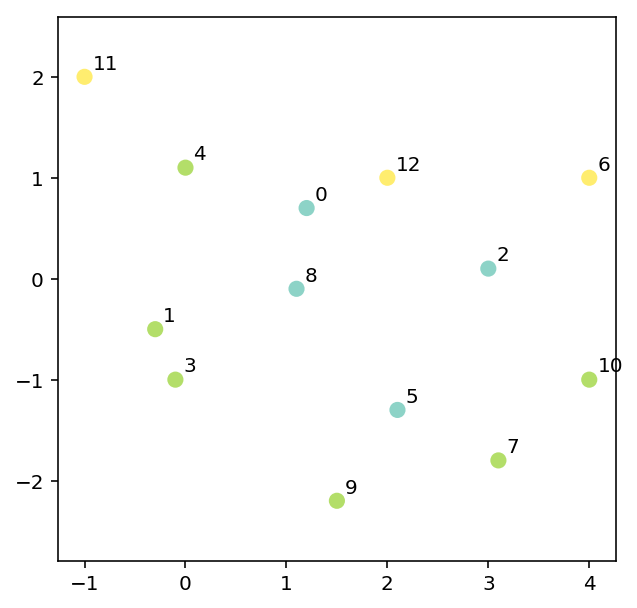

In [5]:
plot_data(data, labels)

### Task 1: Data normalisation and label conversion

Compute the mean (average) value of all the values in the data set:

Compute the standard deviation (average distance from the mean) of all the values in the data set:

Compute the mean (average) value of X coordinates, and of Y coordinates:

Compute the standard deviation of X coordinates, and of Y coordinates:

Normalise the data by subtracting the respective mean from each data point's components and dividing each data point's coordinate by its respective standard deviation value:

Plot the normalised data set and compare it with the original one. What has changed?

Implement a function `convert_label(x)`, which converts a given label `x` into a vector. The vector has as many components as there are labels. Each of vector's components maps to one of the existing labels and encodes the probability that the label `x` is of its kind. 

Test the previously defined function on the number of vectors:

Interpret the result in terms of the mapping of the input to the vectorial output:

Implement the sigmoid function that takes vector input:

### Task 2: More useful numpy functions for manipulating data

`xvec` is a given 5-dimensional vector:

In [ ]:
xvec = sigmoid(np.random.randn(5,1))
xvec

Transform this vector so that each of its components gets rounded to eighter 0 or 1, depending to which one it is closer:

`xvec2` is a given 10-dimensional row vector:

In [ ]:
xvec2 = np.random.randint(10, size=10)
print (xvec2)

Return the index of the maximum value within this vector:

### Task 3:

Here we have our neural network equations in vector form:

Forward pass:

$$
\mathbf{z}^{(l)}=\mathbf{w}^{(l)}\cdot \mathbf{a}^{(l-1)}+\mathbf{b}^{(l)}\\
\mathbf{a}^{(l)}
=
\sigma(\mathbf{z}^{(l)})
\
$$

Cost:

$$
\mathbf{TC} =\|\mathbf{a}^{(l_{final})}-\mathbf{y} \|^2
$$

Backward pass:

$$
\begin{align*}
\delta^{(l_{final})}&=2\left(\mathbf{a}^{(l_{final})}-\mathbf{y}\right)\odot \mathbf{a}^{(l_{final})} \odot \left(\mathbf{1}-\mathbf{a}^{(l_{final})}\right) \\
\delta^{(l)}&=\mathbf{a}^{(l)}\left(1-\mathbf{a}^{(l)}\right)\odot \mathbf{w^T}^{(l+1)} \cdot \mathbf{\delta}^{(l+1)} \\ \partial \mathbf{b}^{(l)}&=\delta^{(l)} \\
\partial \mathbf{W}^{(l)}&=
\delta^{(l)}\cdot\left(a^{(l-1)}\right)^T
\end{align*}
$$

Implement a 2x5x3 neural network using vectors and train it to classify between 3 groups of points associated with different labels:

### Task 4:

Apply the functions `create_meshgrid` and `plot_neural_simple` to visualise the results of the classification. Add the necessary code to the function `plot_neural_simple` where marked:

In [ ]:
def create_meshgrid(data):
    h = 0.02
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return (xx,yy,np.ones(xx.shape))

def plot_neural_simple(params, grid, data, labels, epoch, accuracy):
    nudge = 0.06
    W_3, W_2, b_3, b_2 = params
    xx,yy,Z = grid
    
    for i in range(xx.shape[0]): # row
        for j in range(yy.shape[1]): #column
            dpoint = np.array([xx[i][j], yy[i][j]]).reshape(2,1)
            
            #compute the score 
            
            Z[i][j] = score
            
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111)
    plt.title(f'accuracy at the epoch {epoch}: {accuracy}')
    ax.contourf(xx, yy, Z, cmap=plt.cm.binary, alpha=0.1, zorder=15)
    ax.scatter(data[:, 0], data[:, 1], c=labels, s=50,  cmap=plt.cm.Set3,zorder=50)
    ax.set_aspect('equal')
    for i in range(data.shape[0]):
        d = data[i]
        ax.annotate(f'{i}',(d[0]+nudge,d[1]+nudge))
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show()

### Task 5:

Modify the algorithm to implement batch training: